In [70]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
import tensorflow as tf
import os
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#os.listdir('/content/drive/MyDrive/Dataviz/Project-4/ResourcesfraudTest.csv')

In [10]:
# Load a CSV file from Google Drive
file_path = '/content/drive/MyDrive/Dataviz/Project-4/Resources/fraudTest.csv'
df = pd.read_csv(file_path)


In [11]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# **Data Cleaining**

In [12]:
df= df.drop(columns = ['first','last'])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [13]:
#Set column 1 as the dataset index
df =df.set_index('Unnamed: 0')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
#clean the merchant column by deleting "fraud" from each entry.
merchant_list=[merchant.replace("fraud_","") for merchant in df['merchant']]
merchant_list[:5]

['Kirlin and Sons',
 'Sporer-Keebler',
 'Swaniawski, Nitzsche and Welch',
 'Haley Group',
 'Johnston-Casper']

In [15]:
#add updated merchant names to df
df['merchant_names'] = merchant_list
df=df.drop(columns = 'merchant')
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_names
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Kirlin and Sons
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Sporer-Keebler
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,"Swaniawski, Nitzsche and Welch"
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Haley Group
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Johnston-Casper


In [16]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merchant_names'],
      dtype='object')

In [17]:
#parse data into numeric and categorical
num_df =df.drop(columns = ['category','trans_date_trans_time', 'cc_num','gender', 'street', 'city', 'state', 'zip',
       'job', 'dob', 'trans_num', 'unix_time','merchant_names'])
num_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0


In [18]:
#Parse data into categorical dataset
cat_df = df[['trans_date_trans_time','gender', 'street', 'city', 'state', 'zip',
       'job', 'dob', 'trans_num', 'unix_time','merchant_names']]
cat_df.head()

,trans_date_trans_time,gender,street,city,state,zip,job,dob,trans_num,unix_time,merchant_names
Unnamed: 0,,,,,,,,,,,
0,2020-06-21 12:14:25,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,Kirlin and Sons
1,2020-06-21 12:14:33,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,Sporer-Keebler
2,2020-06-21 12:14:53,F,9333 Valentine Point,Bellmore,NY,11710,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,"Swaniawski, Nitzsche and Welch"
3,2020-06-21 12:15:15,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,Haley Group
4,2020-06-21 12:15:17,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,Johnston-Casper


In [19]:
#Determine count of unique values in each column, more specifically the categories for potential binning
df.nunique()

trans_date_trans_time    223101
cc_num                      915
category                     14
amt                       27412
gender                        2
street                      915
city                        840
state                        50
zip                         903
lat                         901
long                        901
city_pop                    826
job                         478
dob                         901
trans_num                227155
unix_time                223101
merch_lat                225623
merch_long               226509
is_fraud                      2
merchant_names              693
dtype: int64

**Exploratory Data Analysis of Categorical Variables**

<Axes: title={'center': 'Fraudulent purchases per Category'}, xlabel='category', ylabel='Count of Fraudulent Charges'>

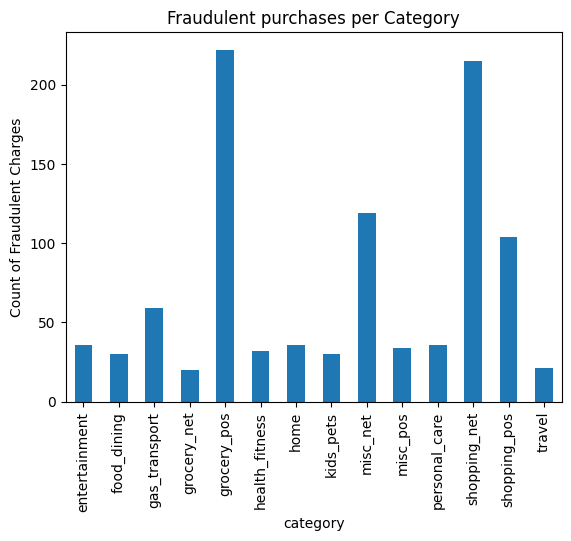

In [65]:
#create and save all categories and their corresponding counts of fraudulent transactions
plot_cat =df['is_fraud'].eq(1).groupby(df['category']).agg('sum')
#Plot categories and their counts of fraudulant charges
plot_cat.plot(kind='bar',title= 'Fraudulent purchases per Category',)

In [44]:
#Create a df of just fraudulent purchases
amt_df =df[df['is_fraud']==1]
#find max purchase amount
amt_df['amt'].max() # =  $1319.97
#find min purchase amount
amt_df['amt'].min() # =  $3.15
# #find average purchase amount
amt_df['amt'].mean() # = $518.81

518.8185010060362

<Axes: title={'center': 'Fraudulent Purchases by Gender'}, xlabel='gender', ylabel='Count of Fraudulent Charges'>

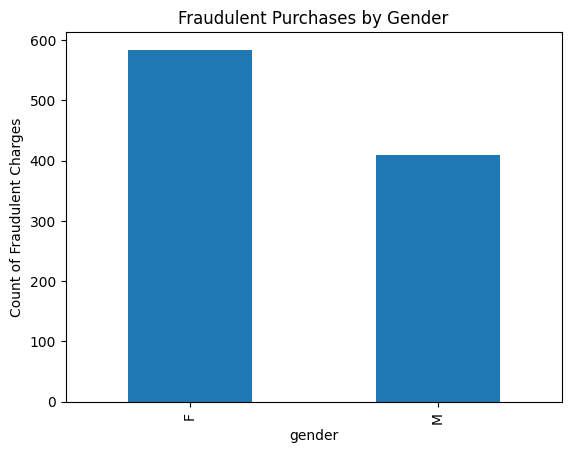

In [64]:
#create gender diagram and their corresponding counts of fraudulent transactions
plot_gen =df['is_fraud'].eq(1).groupby(df['gender']).agg('sum')
#Plot categories and their counts of fraudulant charges
plot_gen.plot(kind='bar',title = "Fraudulent Purchases by Gender",ylabel='Count of Fraudulent Charges')

<Axes: title={'center': 'Top 10 Fraudulent Purchases by state'}, xlabel='state', ylabel='Count of Fraudulent Charges'>

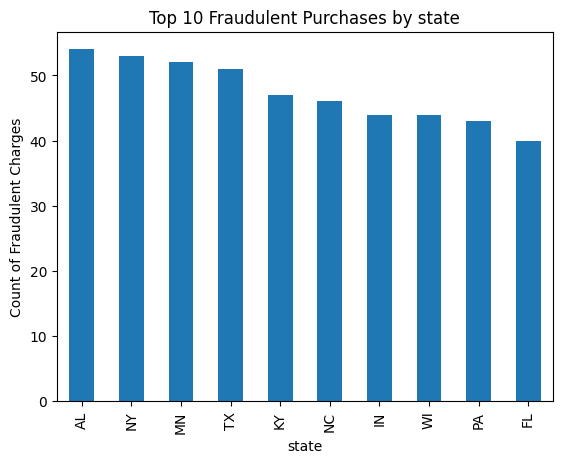

In [68]:
#create chart of states and their corresponding counts of fraudulent transactions
plot_gen =df['is_fraud'].eq(1).groupby(df['state']).agg('sum').nlargest(10)
#Plot categories and their counts of fraudulant charges
plot_gen.plot(kind='bar',title = "Top 10 Fraudulent Purchases by state",ylabel='Count of Fraudulent Charges')

<Axes: title={'center': 'Top 10 Fraudulent Purchases by job'}, xlabel='job', ylabel='Count of Fraudulent Charges'>

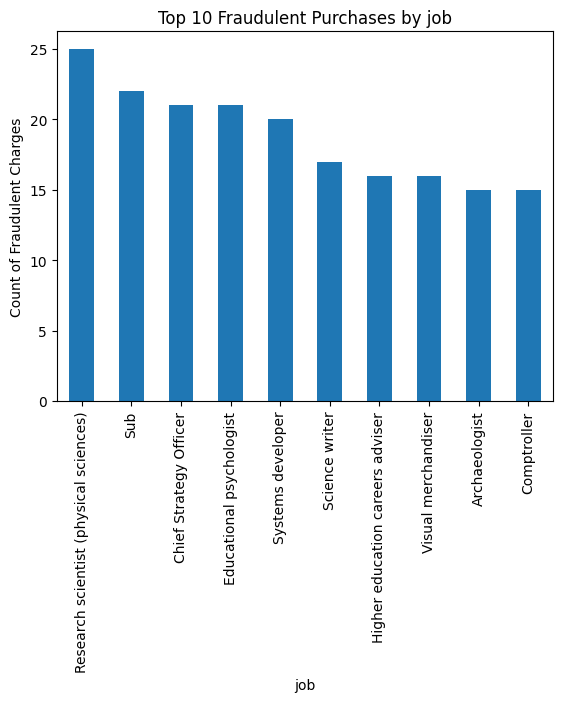

In [67]:
#create chart of states and their corresponding counts of fraudulent transactions
plot_gen =df['is_fraud'].eq(1).groupby(df['job']).agg('sum').nlargest(10)
#Plot categories and their counts of fraudulant charges
plot_gen.plot(kind='bar',title = "Top 10 Fraudulent Purchases by job",ylabel='Count of Fraudulent Charges')

## Neural Network Data Pre-Processing

Attempt 1 (1 Hidden Layer, relu activation function, 6 inpu†s, 1 sigmoid output layer, 50 Epochs

In [56]:
#Split data into target and non-target variables
y = num_df.is_fraud.values
X=num_df.drop(columns='is_fraud')
#Split data into test and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify = y)

In [57]:
#Create an instance of standard scaler
scaler=StandardScaler()

#Fit the Standard Scaler
X_scaler = scaler.fit(X_train)

#Scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

#first hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=6))
# Output layer
n n.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0473 - accuracy: 0.9934
Epoch 2/50
5324/5324 [==============================] - 12s 2ms/step - loss: 0.0207 - accuracy: 0.9956
Epoch 3/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0197 - accuracy: 0.9956
Epoch 4/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0194 - accuracy: 0.9956
Epoch 5/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0192 - accuracy: 0.9956
Epoch 6/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0189 - accuracy: 0.9956
Epoch 7/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0188 - accuracy: 0.9956
Epoch 8/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0186 - accuracy: 0.9956
Epoch 9/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0185 - accuracy: 0.9957
Epoch 10/50
5324/5324 [==============================] - 8s 2ms/step - loss: 

In [87]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1775/1775 - 6s - loss: 0.0178 - accuracy: 0.9956 - 6s/epoch - 3ms/step
Loss: 0.01780916564166546, Accuracy: 0.9956329464912415


Attempt 1 Accuracy Score: 99.56%

Attempt 2 (2 Hidden Layer, relu activation function, 6 inpu†s, 1 sigmoid output layer, 50 Epochs

In [89]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn2 = tf.keras.models.Sequential()

#first hidden layer
nn2.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=6))
#second hidden layer
nn2.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=6))
# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# Compile the Sequential model together and customize metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5324/5324 [==============================] - 14s 2ms/step - loss: 0.0635 - accuracy: 0.9790
Epoch 2/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0195 - accuracy: 0.9956
Epoch 3/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0191 - accuracy: 0.9956
Epoch 4/50
5324/5324 [==============================] - 11s 2ms/step - loss: 0.0190 - accuracy: 0.9956
Epoch 5/50
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0188 - accuracy: 0.9956
Epoch 6/50
5324/5324 [==============================] - 11s 2ms/step - loss: 0.0187 - accuracy: 0.9957
Epoch 7/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0184 - accuracy: 0.9957
Epoch 8/50
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0182 - accuracy: 0.9956
Epoch 9/50
5324/5324 [==============================] - 11s 2ms/step - loss: 0.0181 - accuracy: 0.9957
Epoch 10/50
5324/5324 [==============================] - 10s 2ms/step - los

In [91]:
# Evaluate the model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

1775/1775 - 3s - loss: 0.0170 - accuracy: 0.9954 - 3s/epoch - 2ms/step
Loss: 0.01699928380548954, Accuracy: 0.9954392313957214


Attempt 2 Accuracy Score: 99.54%

Attempt 3 (1 Hidden Layer, relu activation function, 6 inpu†s, 1 sigmoid output layer and 25 Epochs

In [92]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn3 = tf.keras.models.Sequential()

#first hidden layer
nn3.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=6))
# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
# Compile the Sequential model together and customize metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
5324/5324 [==============================] - 11s 2ms/step - loss: 0.0673 - accuracy: 0.9821
Epoch 2/25
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0218 - accuracy: 0.9954
Epoch 3/25
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0204 - accuracy: 0.9955
Epoch 4/25
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0201 - accuracy: 0.9956
Epoch 5/25
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0200 - accuracy: 0.9956
Epoch 6/25
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0199 - accuracy: 0.9956
Epoch 7/25
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0198 - accuracy: 0.9956
Epoch 8/25
5324/5324 [==============================] - 9s 2ms/step - loss: 0.0199 - accuracy: 0.9956
Epoch 9/25
5324/5324 [==============================] - 10s 2ms/step - loss: 0.0199 - accuracy: 0.9956
Epoch 10/25
5324/5324 [==============================] - 10s 2ms/step - loss

In [95]:
 # Evaluate the model using the test data
model_loss3, model_accuracy3 = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

1775/1775 - 4s - loss: 0.0192 - accuracy: 0.9956 - 4s/epoch - 2ms/step
Loss: 0.019206976518034935, Accuracy: 0.9956153631210327


Attempt 3 Accuracy Score: 99.56%